# 3dasm Project

## Agenda
1. [Phase 1: Gaussian Process on Simulated Data only](#Phase-1:-Gaussian-Process-on-Simulated-Data-only)
2. [Training with Different Kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-common-Constant*RBF-kernel-with-an-optimizer-fmin_1_bfgs_b)
3. [Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-ExpSineSquared-with-an-optimizer-fmin_1_bfgs_b)
4. [Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-Matern-with-an-optimizer-fmin_1_bfgs_b)
5. [Training with Different Kernels: common Constant*RBF kernel With No Optimizer](#Training-with-Different-Kernels:-common-Constant*RBF-kernel-With-No-Optimizer)
6. [Training with Different Kernels: ExpSineSquared with no optimizer](#Training-with-Different-Kernels:-ExpSineSquared-with-no-optimizer)
7. [Training with Different Kernels: Matern with no optimizer](#Training-with-Different-Kernels:-Matern-with-no-optimizer)
8. [Phase 1.5: Gaussian Process on Experimental Data Only](#Phase-1.5:-Gaussian-Process-on-Experimental-Data-Only)
9. [Training with Different kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b](#Training-with-Different-kernels:-common-Constant*RBF-kernel-with-an-optimizer-fmin_1_bfgs_b)
10. [Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-ExpSineSquared-with-an-optimizer-fmin_1_bfgs_b)
11. [Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b](#Training-with-Different-Kernels:-Matern-with-an-optimizer-fmin_1_bfgs_b)
12. [Phase 2: Training with Simulation Data and Testing with Experimental Data](#Phase-2:-Training-with-Simulation-Data-and-Testing-with-Experimental-Data)
13. [Constant Kernel and  f_min optimizer](#Constant-Kernel-and-f_min-optimizer)
14. [Matern kernel with no optimizer](#Matern-kernel-with-no-optimizer)
15. [Phase 3: Multi-fidelity Gaussian Process](#Phase-3:-Multi-fidelity-Gaussian-Process)
16. [Phase 4: Error Metrics](#Phase-4:-Error-Metrics)

### Importing necessary packages

In [4]:
import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math
import pandas as pd

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared, ConstantKernel, WhiteKernel

<a id='Phase 1: Gaussian Process on Simulated Data only'></a>

## Phase 1: Gaussian Process on Simulated Data only

In [6]:
sim_df = pd.read_csv("bdata/neoHookean/data_0.00021544_0.001.csv") # read pandas DataFrame
print("Show the simulated DataFrameused for training data:\n", sim_df)

('Show the simulated DataFrameused for training data:\n',              0         1
0     0.001223  0.999985
1     0.002445  0.999941
2     0.003668  0.999867
3     0.004891  0.999764
4     0.006114  0.999631
5     0.007336  0.999469
6     0.008559  0.999278
7     0.009782  0.999056
8     0.011005  0.998806
9     0.012227  0.998526
10    0.013450  0.998216
11    0.014673  0.997877
12    0.015896  0.997508
13    0.017118  0.997109
14    0.018341  0.996681
15    0.019564  0.996224
16    0.020787  0.995736
17    0.022009  0.995219
18    0.023232  0.994672
19    0.024455  0.994095
20    0.025677  0.993488
21    0.026900  0.992852
22    0.028123  0.992185
23    0.029346  0.991488
24    0.030568  0.990761
25    0.031791  0.990004
26    0.033014  0.989217
27    0.034237  0.988399
28    0.035459  0.987551
29    0.036682  0.986672
...        ...       ...
1969  2.408789  0.431587
1970  2.410012  0.431617
1971  2.411235  0.431653
1972  2.412458  0.431696
1973  2.413680  0.431746
1974  2.414903  0

In [7]:
Data_x = sim_df.iloc[:,0] # select the input VALUES from your dataframe into Data_x
Data_y = sim_df.iloc[:,1] # select the output VALUES from your dataframe inta Data_y
print("Data_x is:\n",Data_x)
print("\nData_y is:\n",Data_y)

('Data_x is:\n', 0       0.001223
1       0.002445
2       0.003668
3       0.004891
4       0.006114
5       0.007336
6       0.008559
7       0.009782
8       0.011005
9       0.012227
10      0.013450
11      0.014673
12      0.015896
13      0.017118
14      0.018341
15      0.019564
16      0.020787
17      0.022009
18      0.023232
19      0.024455
20      0.025677
21      0.026900
22      0.028123
23      0.029346
24      0.030568
25      0.031791
26      0.033014
27      0.034237
28      0.035459
29      0.036682
          ...   
1969    2.408789
1970    2.410012
1971    2.411235
1972    2.412458
1973    2.413680
1974    2.414903
1975    2.416126
1976    2.417348
1977    2.418571
1978    2.419794
1979    2.421017
1980    2.422239
1981    2.423462
1982    2.424685
1983    2.425908
1984    2.427130
1985    2.428353
1986    2.429576
1987    2.430799
1988    2.432021
1989    2.433244
1990    2.434467
1991    2.435689
1992    2.436912
1993    2.438135
1994    2.439358
1995    2.4405

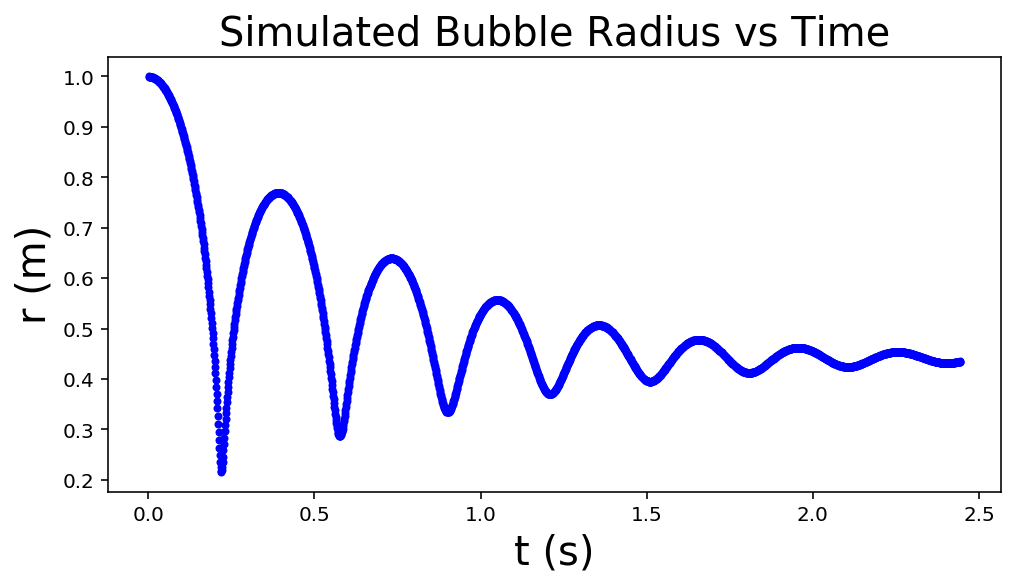

In [8]:
fig_sim_data, ax_sim_data = plt.subplots() # create a plot
ax_sim_data.plot(Data_x, Data_y, 'b.')
ax_sim_data.set_xlabel("t (s)", fontsize=20) # create x-axis label with font size 20
ax_sim_data.set_ylabel("r (m)", fontsize=20) # create y-axis label with font size 20
ax_sim_data.set_title("Simulated Bubble Radius vs Time", fontsize=20); # create title with font size 20
plt.show(fig_sim_data)

In [19]:
from sklearn.model_selection import train_test_split

n_data = 50 # number of points in our dataset
testset_ratio = 0.10 # ratio of test set points from the dataset

X_data = np.reshape(Data_x,(-1,1)) # a 2D array that scikit-learn likes

seed = 1987 # set a random seed so that everyone gets the same result
np.random.seed(seed)

# Let's split into 10% training points and the rest for testing:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                    Data_y, test_size=testset_ratio,
                                    random_state=seed)

x_train = X_train.ravel() # just for plotting later
x_test = X_test.ravel() # just for plotting later

print("Here's a print of X_train:\n", X_train)

("Here's a print of X_train:\n", array([[ 2.00650926],
       [ 2.29262941],
       [ 0.29957024],
       ..., 
       [ 2.39167101],
       [ 0.64438171],
       [ 1.85489004]]))


In [20]:
n_max = np.max(X_data)
print(n_max)

# Define points used for plotting
n_plot = 500 # number of points used for plotting the model
n_max = np.max(X_data)
x_plot = np.linspace(0, n_max, n_plot) # create dataset with uniformly spaced points
X_plot = np.reshape(x_plot,(-1,1)) # a 2D array that scikit-learn likes

2.44424864019


<b id='Training with Different Kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b'></b>

### Training with Different Kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b

In [21]:
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the very common Constant*RBF kernel

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [22]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

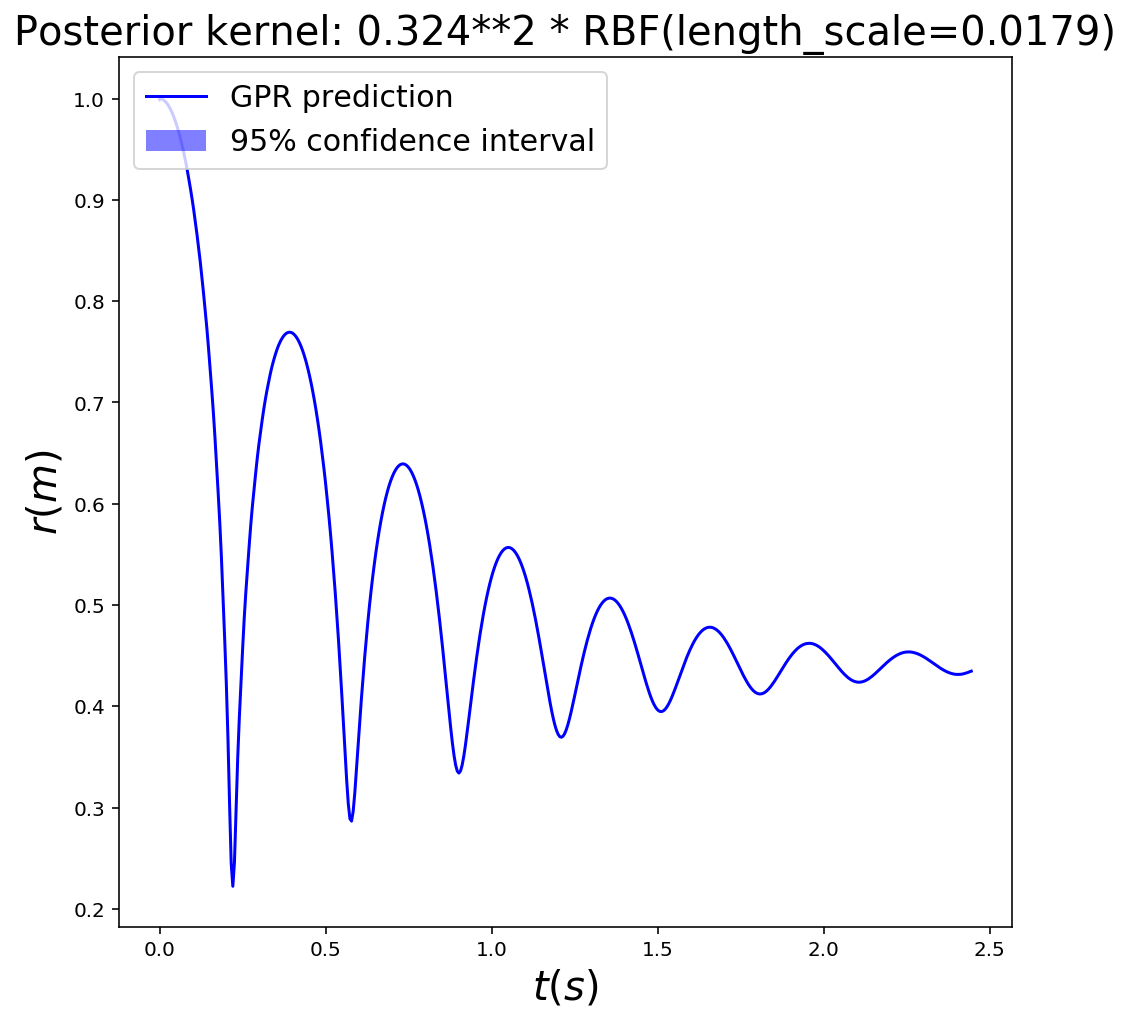

In [23]:
fig1

In [11]:
# Plot the function, the prediction and the 95% confidence interval
fig2, ax2 = plt.subplots()

ax2.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax2.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax2.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax2.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax2.set_xlabel('$t (s)$', fontsize=20)
ax2.set_ylabel('$r (m)$', fontsize=20)
ax2.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax2.set_ylim(-10, 15) # just to provide more space for the legend
ax2.legend(loc='upper left', fontsize=15)
fig2.set_size_inches(8,8)
plt.close(fig2) # close the plot to see it in next cell

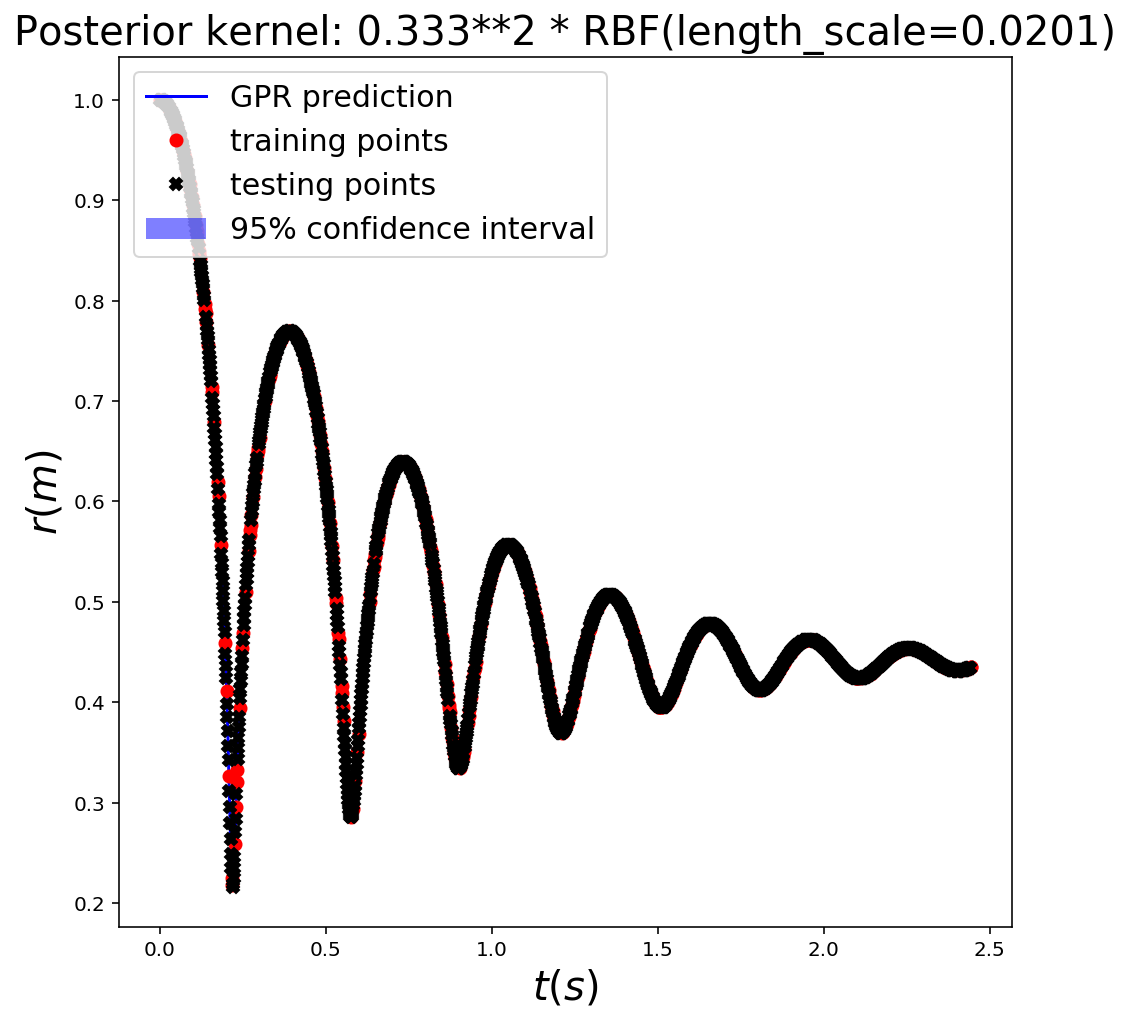

In [12]:
fig2

<c id='Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b'></c>

### Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b

In [13]:
# Define the kernel function
kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
                        length_scale_bounds=(0.1, 10.0),
                        periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

/gpfs/runtime/opt/anaconda/2-4.3.0/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00190542,  0.02666375, -0.00763744]), 'nit': 14, 'funcalls': 74}
  " state: %s" % convergence_dict)


In [14]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

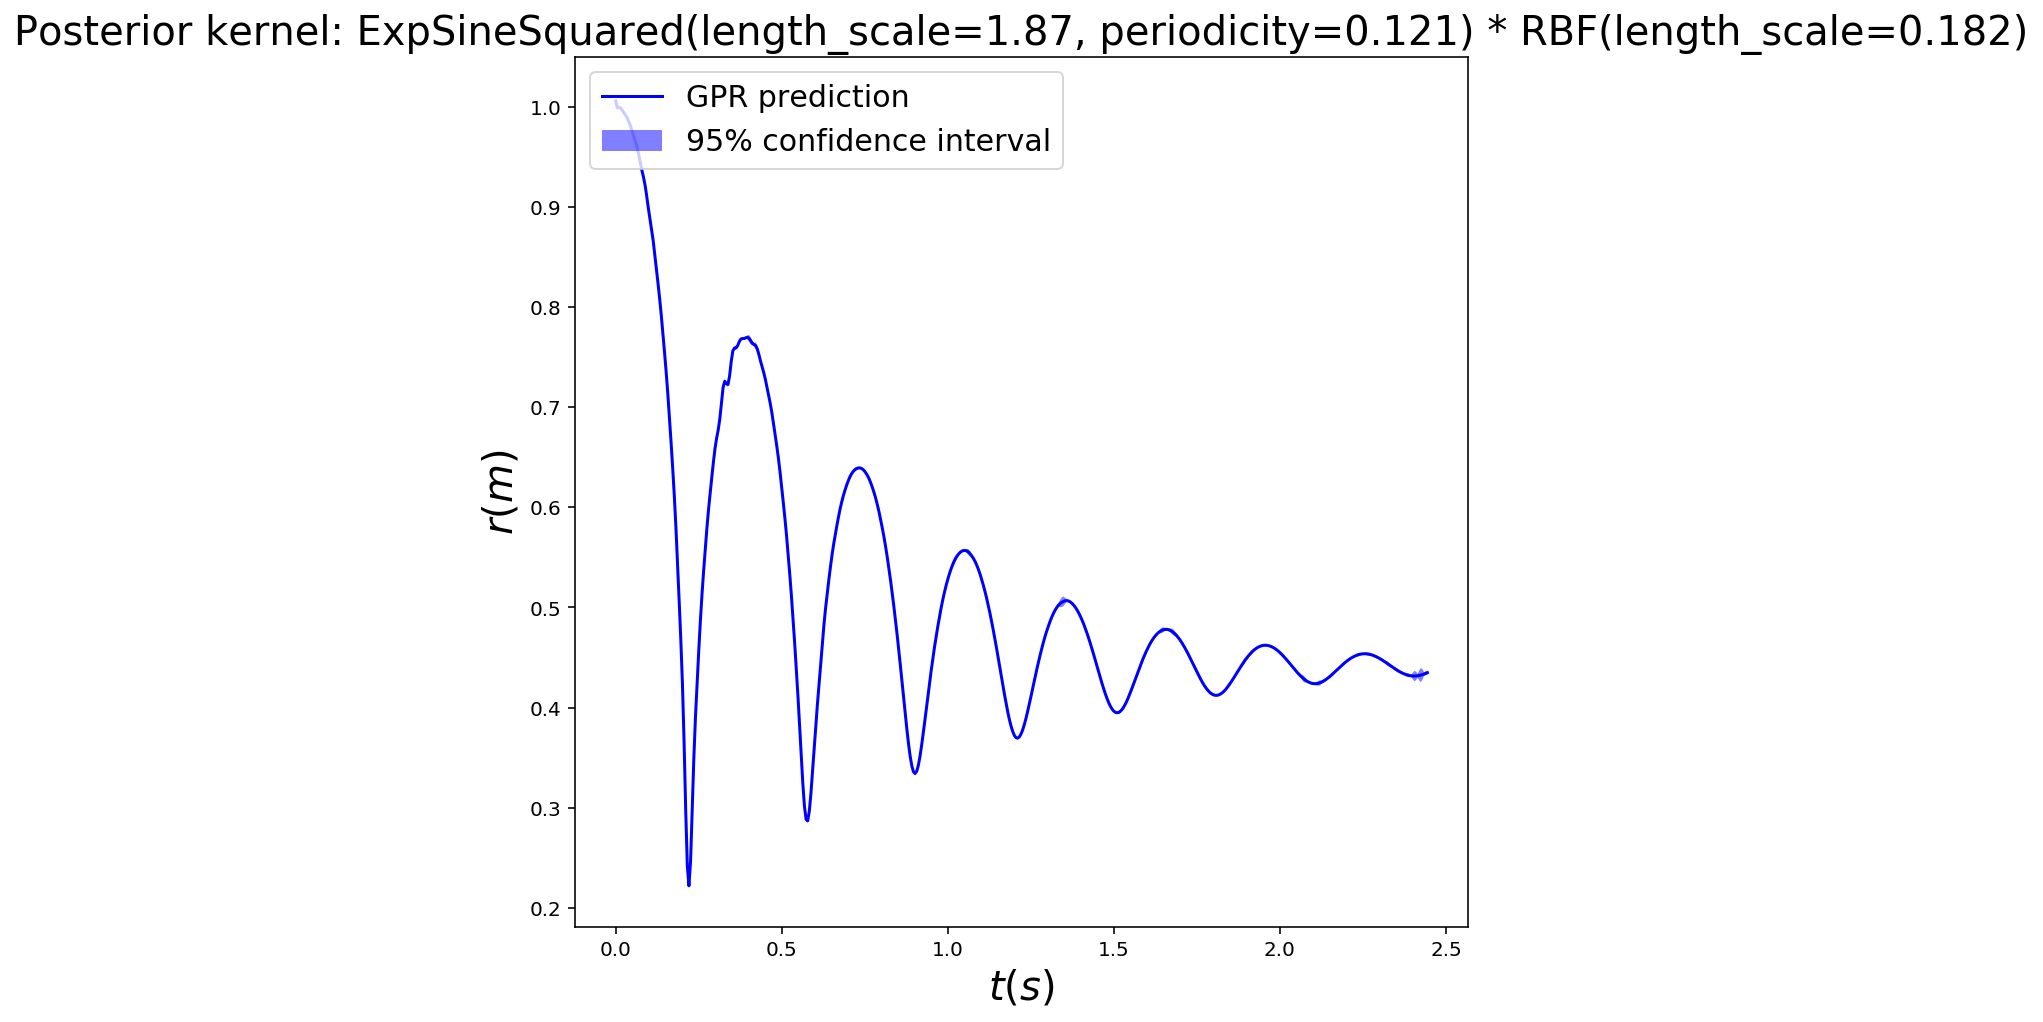

In [15]:
fig1

In [16]:
# Plot the function, the prediction and the 95% confidence interval
fig2, ax2 = plt.subplots()

ax2.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax2.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax2.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax2.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax2.set_xlabel('$x$', fontsize=20)
ax2.set_ylabel('$f(x)$', fontsize=20)
ax2.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax2.set_ylim(-10, 15) # just to provide more space for the legend
ax2.legend(loc='upper left', fontsize=15)
fig2.set_size_inches(8,8)
plt.close(fig2) # close the plot to see it in next cell

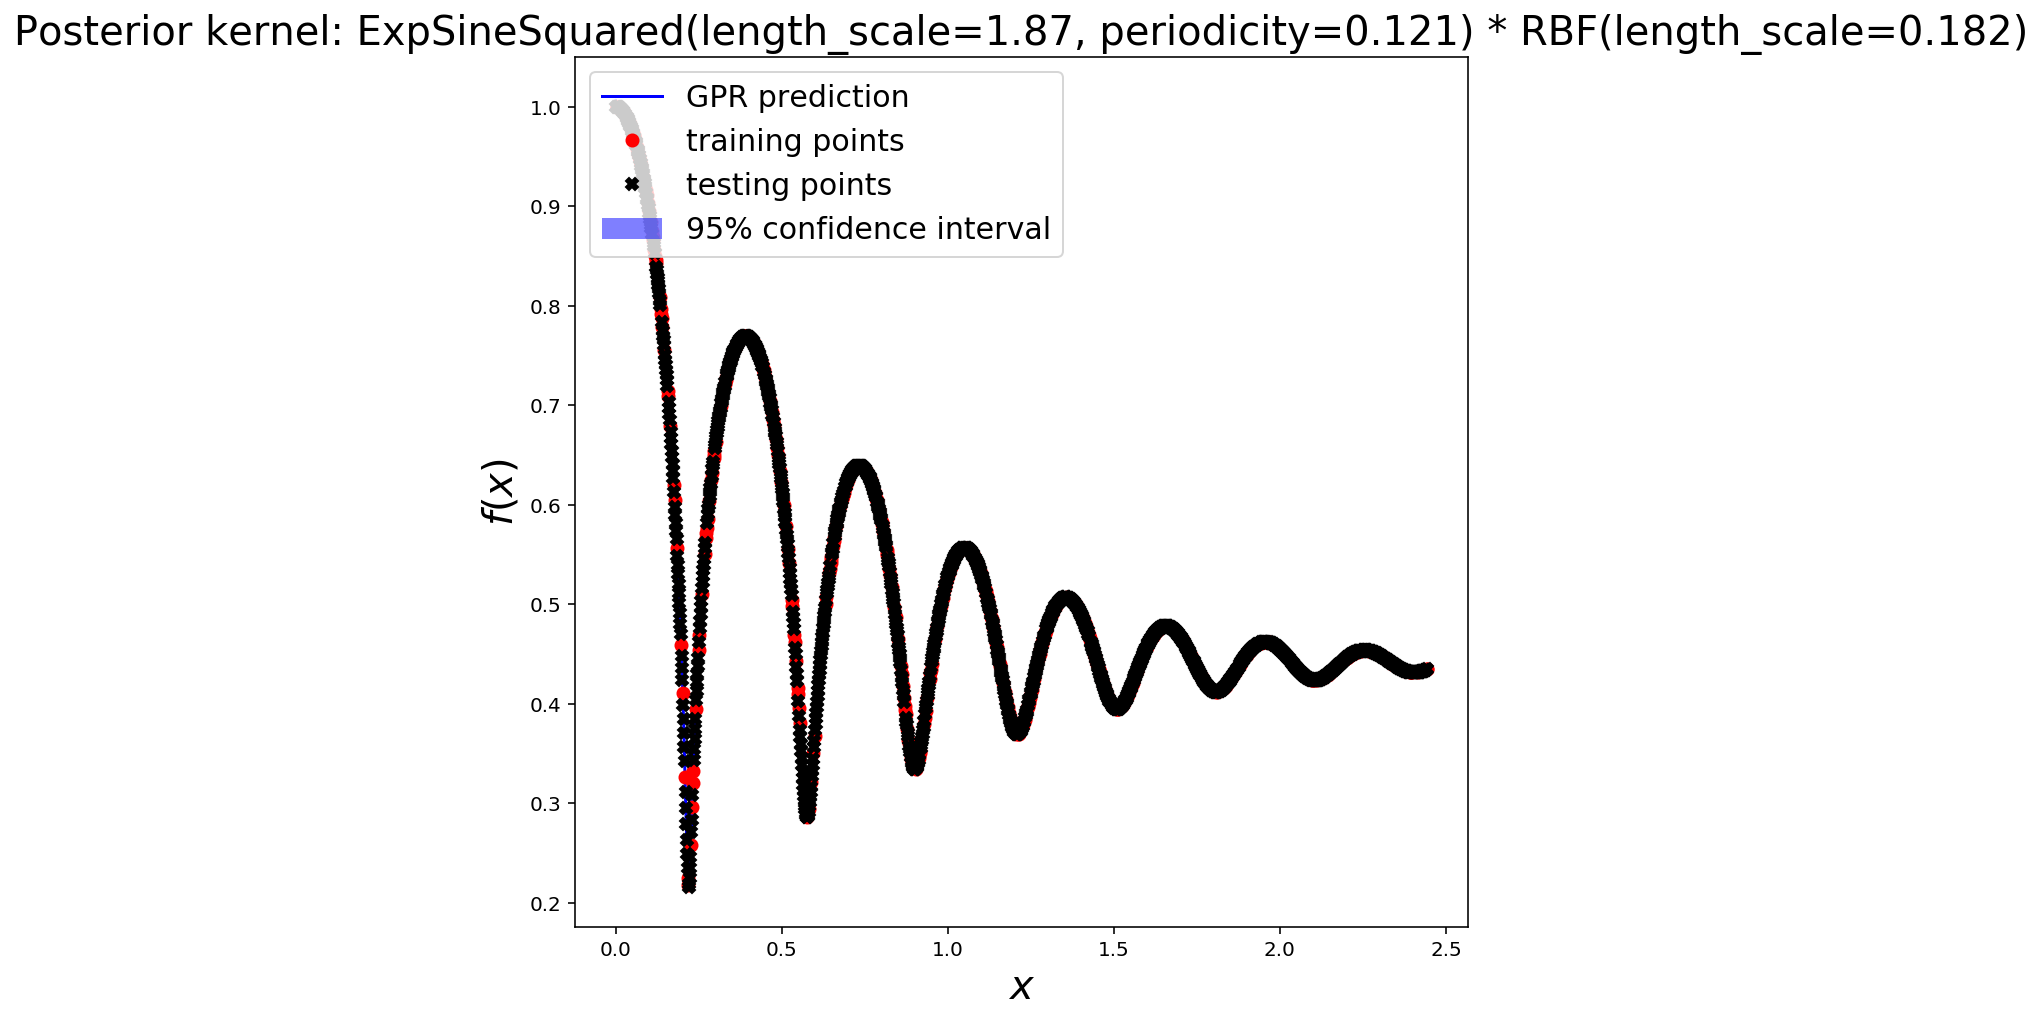

In [17]:
fig2

<d id='Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b'></d>

### Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b

In [18]:
# Define the kernel function
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [19]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

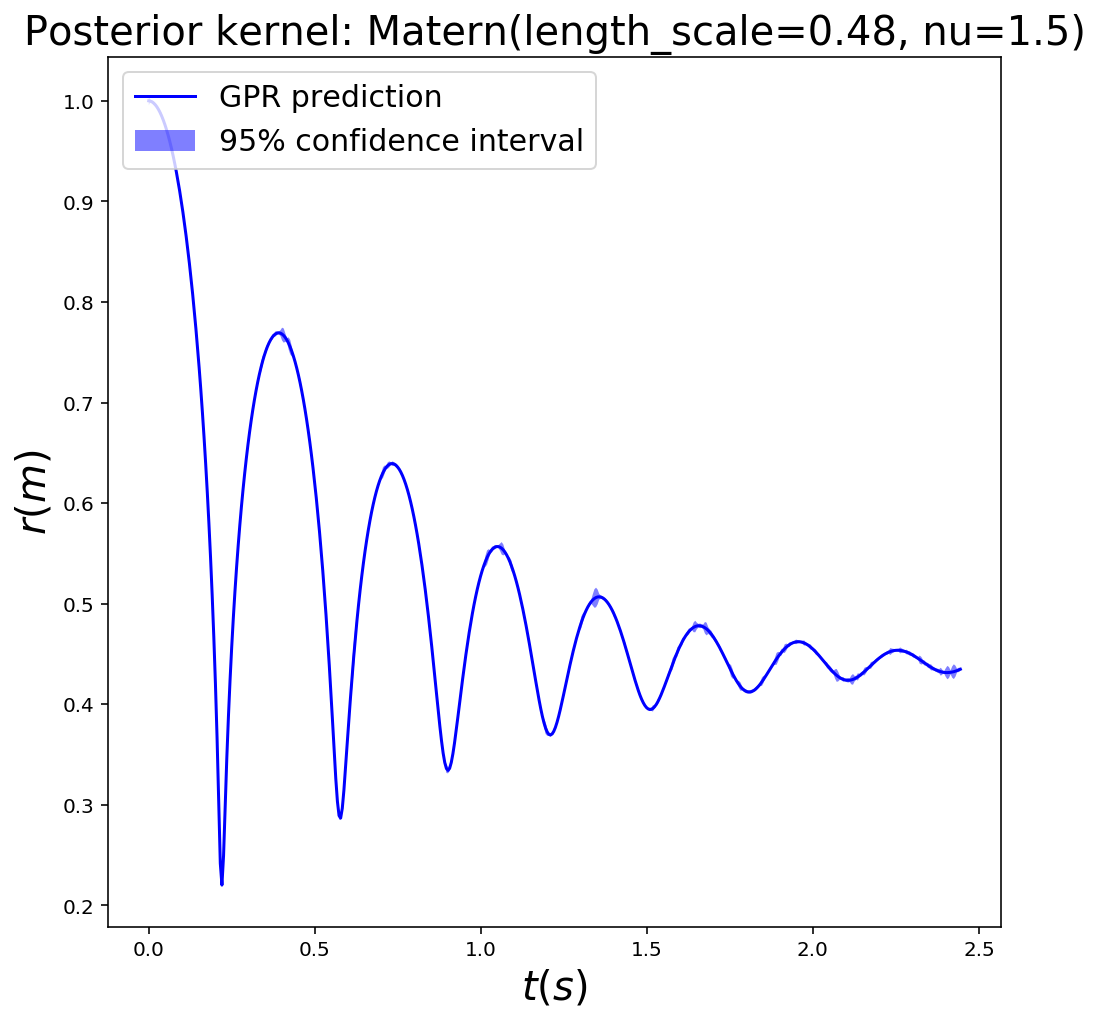

In [20]:
fig1

In [21]:
# Plot the function, prediction and the 95% confidence interval
fig2, ax2 = plt.subplots()

ax2.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax2.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax2.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax2.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax2.set_xlabel('$t (s)$', fontsize=20)
ax2.set_ylabel('$r (m)$', fontsize=20)
ax2.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax2.set_ylim(-10, 15) # just to provide more space for the legend
ax2.legend(loc='upper left', fontsize=15)
fig2.set_size_inches(8,8)
plt.close(fig2) # close the plot to see it in next cell

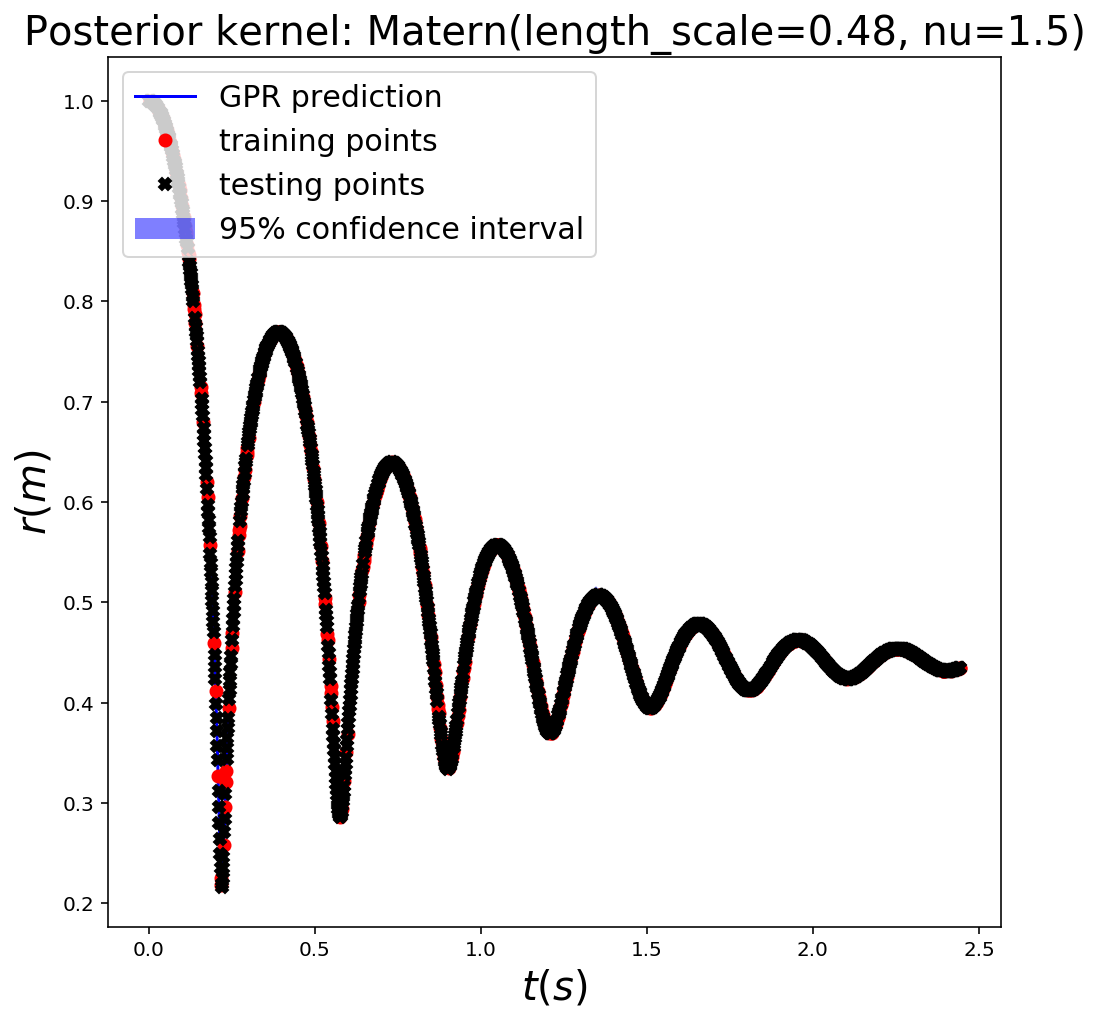

In [22]:
fig2

<e id='Training with Different Kernels: common Constant*RBF kernel With No Optimizer'></e>

### Training with Different Kernels: common Constant*RBF kernel With No Optimizer

In [23]:
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the very common Constant*RBF kernel

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

/gpfs/runtime/opt/anaconda/2-4.3.0/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [24]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

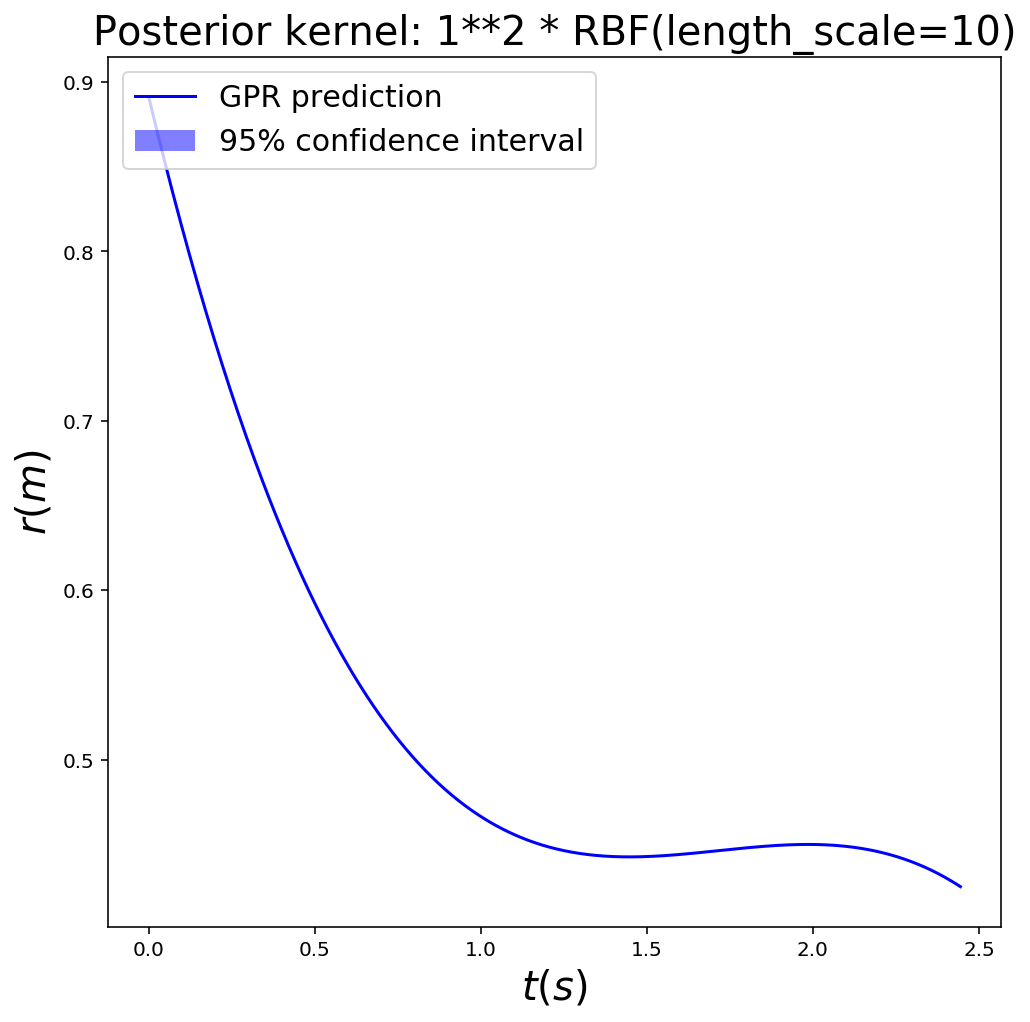

In [25]:
fig1

<f id='Training with Different Kernels: ExpSineSquared with no optimizer'></f>

### Training with Different Kernels: ExpSineSquared with no optimizer

In [26]:
# Define the kernel function
kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
                        length_scale_bounds=(0.1, 10.0),
                        periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [27]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

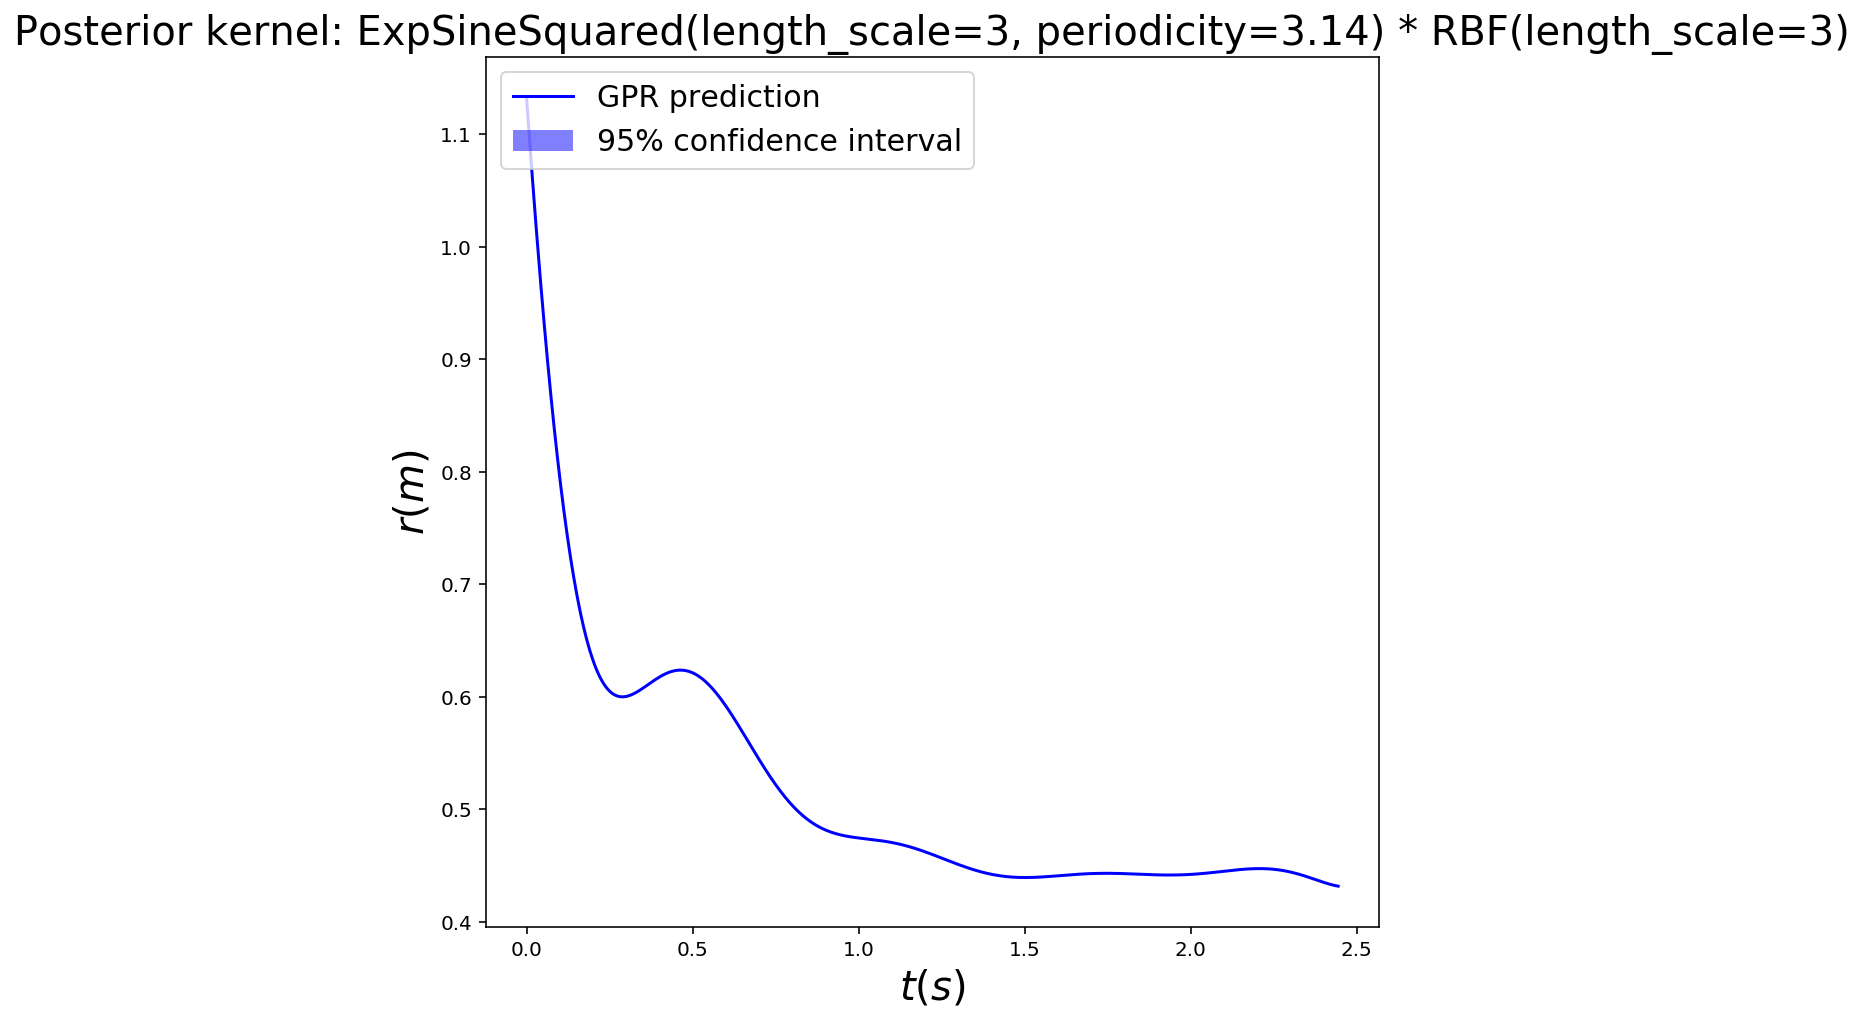

In [28]:
fig1

<g id='Training with Different Kernels: Matern with no optimizer'></g>

### Training with Different Kernels: Matern with no optimizer

In [29]:
# Define the kernel function
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [30]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

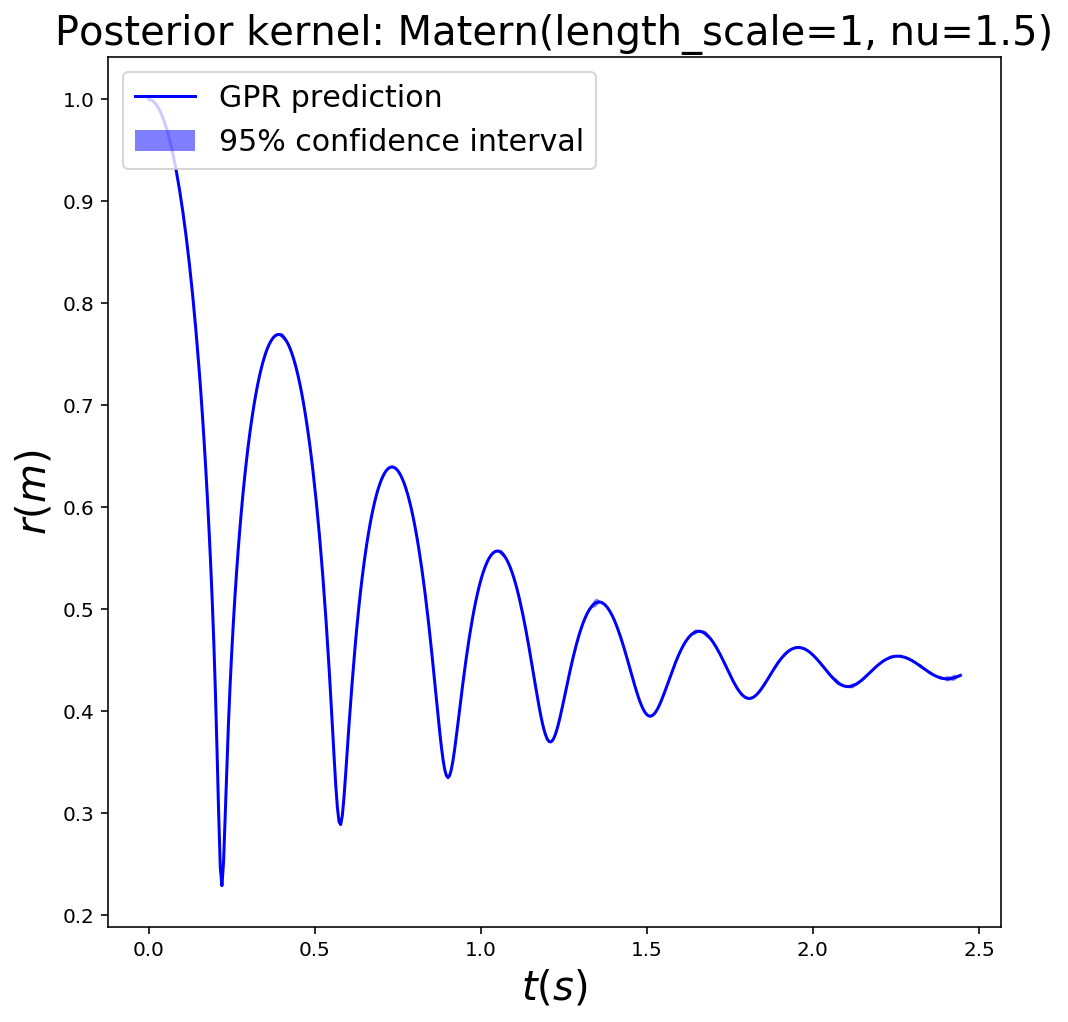

In [31]:
fig1

### different optimizers? different ratios of training/testing data?

<h id='Phase 1.5: Gaussian Process on Experimental Data Only'></h>

# Phase 1.5: Gaussian Process on Experimental Data Only

In [24]:
exp_df = pd.read_csv("PolyAcry_12_28_04") # read pandas DataFrame
print("Show the experimental DataFrame used for testing data:\n", exp_df)

('Show the experimental DataFrame used for testing data:\n',             0      NaN    NaN.1
0    0.000001      NaN      NaN
1    0.000002      NaN      NaN
2    0.000003      NaN      NaN
3    0.000004   96.012   94.888
4    0.000005  124.310  122.580
5    0.000006  143.990  142.260
6    0.000007  159.420  158.010
7    0.000008  172.240  170.520
8    0.000009  183.150  181.680
9    0.000010  192.660  191.210
10   0.000011  200.750  199.140
11   0.000012  207.900  206.670
12   0.000013  214.140  213.200
13   0.000014  219.450  218.480
14   0.000015  224.120  222.980
15   0.000016  227.920  227.030
16   0.000017  231.350  230.550
17   0.000018  233.750  233.030
18   0.000019  235.900  235.170
19   0.000020  237.260  236.390
20   0.000021  238.370  237.810
21   0.000022  239.100  238.570
22   0.000023  239.260  238.970
23   0.000024  238.920  238.450
24   0.000025  238.270  237.680
25   0.000026  237.040  236.690
26   0.000027  235.120  234.790
27   0.000028  233.060  232.870
28   0.0000

In [25]:
Data_t_exp = exp_df.iloc[:,0]
Data_R1_exp = exp_df.iloc[:,1] 
Data_R2_exp = exp_df.iloc[:,2] 
print("Experimental x data is time:\n",Data_t_exp)
print("Experimental Bubble Radius from camera one is:\n",Data_R1_exp)
print("Experimental Bubble Radius from camera two is:\n",Data_R2_exp)

('Experimental x data is time:\n', 0      0.000001
1      0.000002
2      0.000003
3      0.000004
4      0.000005
5      0.000006
6      0.000007
7      0.000008
8      0.000009
9      0.000010
10     0.000011
11     0.000012
12     0.000013
13     0.000014
14     0.000015
15     0.000016
16     0.000017
17     0.000018
18     0.000019
19     0.000020
20     0.000021
21     0.000022
22     0.000023
23     0.000024
24     0.000025
25     0.000026
26     0.000027
27     0.000028
28     0.000029
29     0.000030
         ...   
225    0.000226
226    0.000227
227    0.000228
228    0.000229
229    0.000230
230    0.000231
231    0.000232
232    0.000233
233    0.000234
234    0.000235
235    0.000236
236    0.000237
237    0.000238
238    0.000239
239    0.000240
240    0.000241
241    0.000242
242    0.000243
243    0.000244
244    0.000245
245    0.000246
246    0.000247
247    0.000248
248    0.000249
249    0.000250
250    0.000251
251    0.000252
252    0.000253
253    0.000254
254  

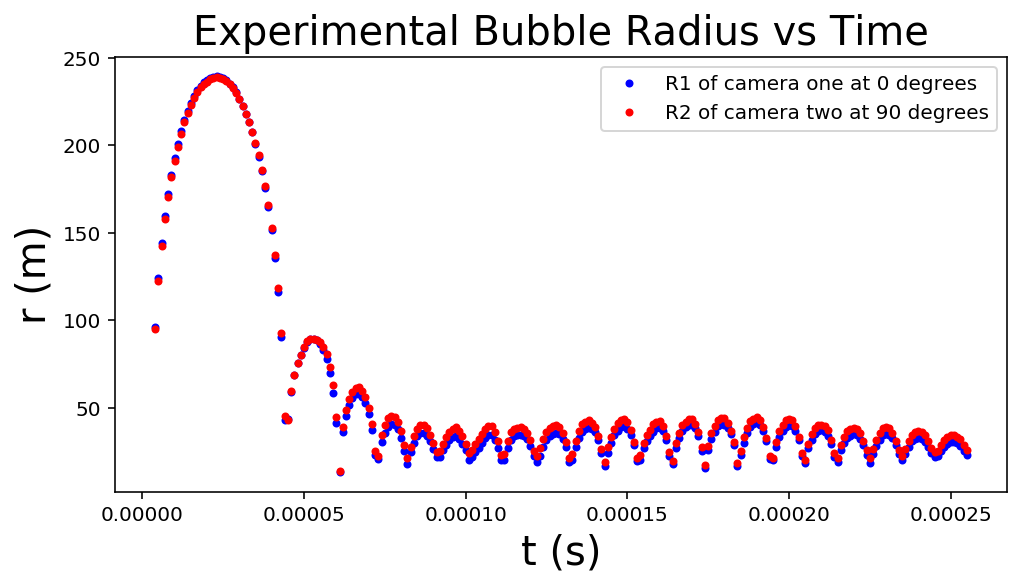

In [26]:
fig_exp_data, ax_exp_data = plt.subplots() # create a plot
R1_line = ax_exp_data.plot(Data_t_exp, Data_R1_exp, 'b.', label='R1 of camera one at 0 degrees')
R2_line = ax_exp_data.plot(Data_t_exp, Data_R2_exp, 'r.',label='R2 of camera two at 90 degrees')
ax_exp_data.set_xlabel("t (s)", fontsize=20) # create x-axis label with font size 20
ax_exp_data.set_ylabel("r (m)", fontsize=20) # create y-axis label with font size 20
ax_exp_data.set_title("Experimental Bubble Radius vs Time", fontsize=20); # create title with font size 20

handles, labels = ax_exp_data.get_legend_handles_labels()
ax_exp_data.legend(handles, labels)
plt.show(fig_exp_data)

In [27]:
n_data = len(Data_t_exp) # number of points in our dataset
testset_ratio = 0.75 # ratio of test set points from the dataset

t_data = np.reshape(Data_t_exp,(-1,1)) # a 2D array that scikit-learn likes

seed = 1987 # set a random seed so that everyone gets the same result
np.random.seed(seed)

# Let's split into 10% training points and the rest for testing:
X_train, X_test, y_train, y_test = train_test_split(t_data,
                                    Data_R1_exp, test_size=testset_ratio,
                                    random_state=seed)

x_train = X_train.ravel() # just for plotting later
x_test = X_test.ravel() # just for plotting later

print("Here's a print of X_train:\n", X_train)

("Here's a print of X_train:\n", array([[  2.01000000e-04],
       [  1.08000000e-04],
       [  8.70000000e-05],
       [  1.80000000e-05],
       [  1.99000000e-04],
       [  1.95000000e-04],
       [  2.41000000e-04],
       [  2.49000000e-04],
       [  4.70000000e-05],
       [  1.78000000e-04],
       [  1.71000000e-04],
       [  7.90000000e-05],
       [  1.51000000e-04],
       [  4.00000000e-05],
       [  1.94000000e-04],
       [  5.60000000e-05],
       [  1.00000000e-04],
       [  1.44000000e-04],
       [  9.00000000e-05],
       [  1.06000000e-04],
       [  1.20000000e-04],
       [  1.15000000e-04],
       [  7.20000000e-05],
       [  2.38000000e-04],
       [  3.30000000e-05],
       [  2.10000000e-05],
       [  1.40000000e-04],
       [  8.30000000e-05],
       [  2.50000000e-04],
       [  7.00000000e-05],
       [  2.31000000e-04],
       [  4.60000000e-05],
       [  3.10000000e-05],
       [  9.50000000e-05],
       [  1.10000000e-04],
       [  1.62000000e-

In [28]:
n_exp_max = np.max(t_data)
print(n_exp_max)

# Define points used for plotting
n_plot = 500 # number of points used for plotting the model
n_max = np.max(t_data)
x_exp_plot = np.linspace(0, n_exp_max, n_plot) # create dataset with uniformly spaced points
X_exp_plot = np.reshape(x_exp_plot,(-1,1)) # a 2D array that scikit-learn likes

0.000255


<i id='Training with Different kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b'></i>

## Training with Different kernels: common Constant*RBF kernel with an optimizer fmin_1_bfgs_b

In [44]:
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the very common Constant*RBF kernel

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_exp_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [45]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

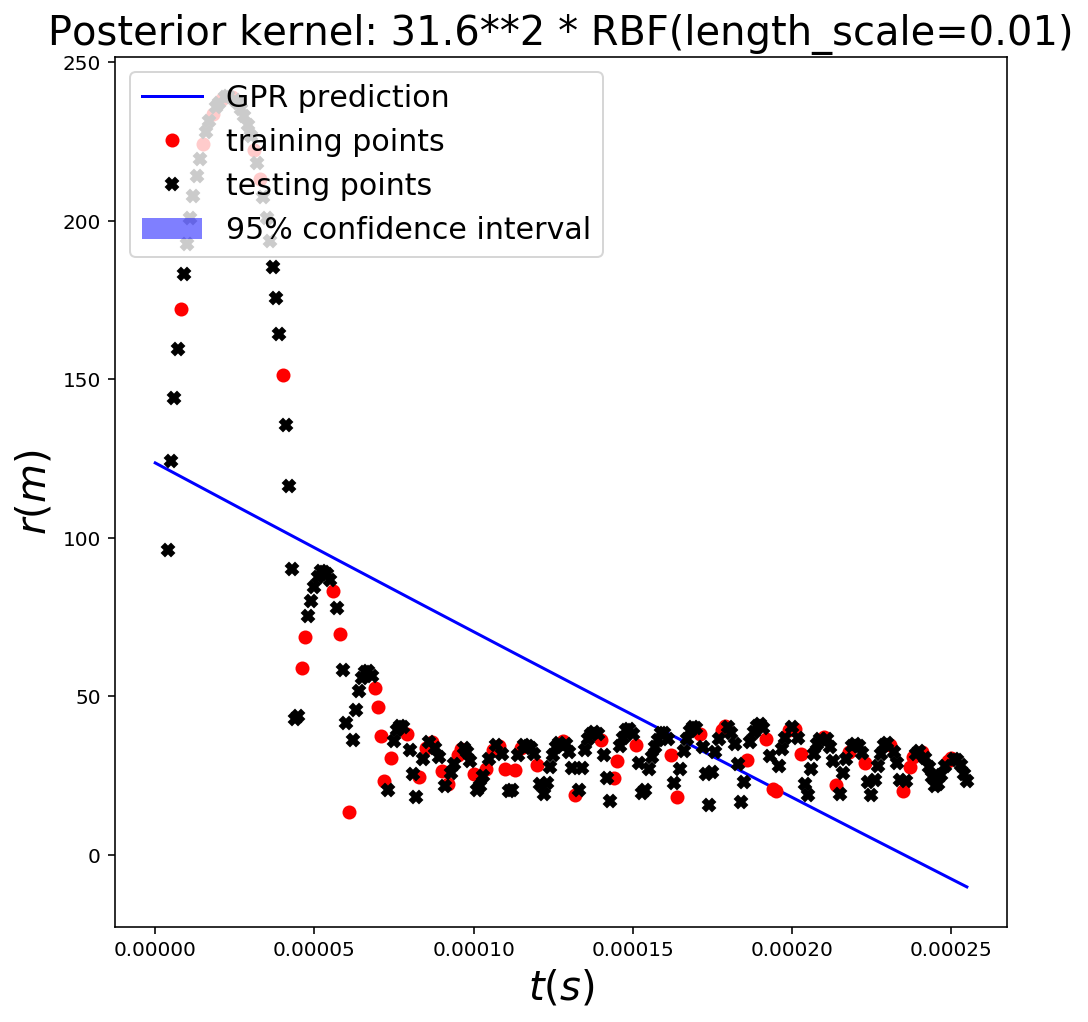

In [46]:
fig1

<j id='Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b'></j>

### Training with Different Kernels: ExpSineSquared with an optimizer fmin_1_bfgs_b

In [97]:
# Define the kernel function
kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
                        length_scale_bounds=(0.1, 10.0),
                        periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_exp_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [98]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

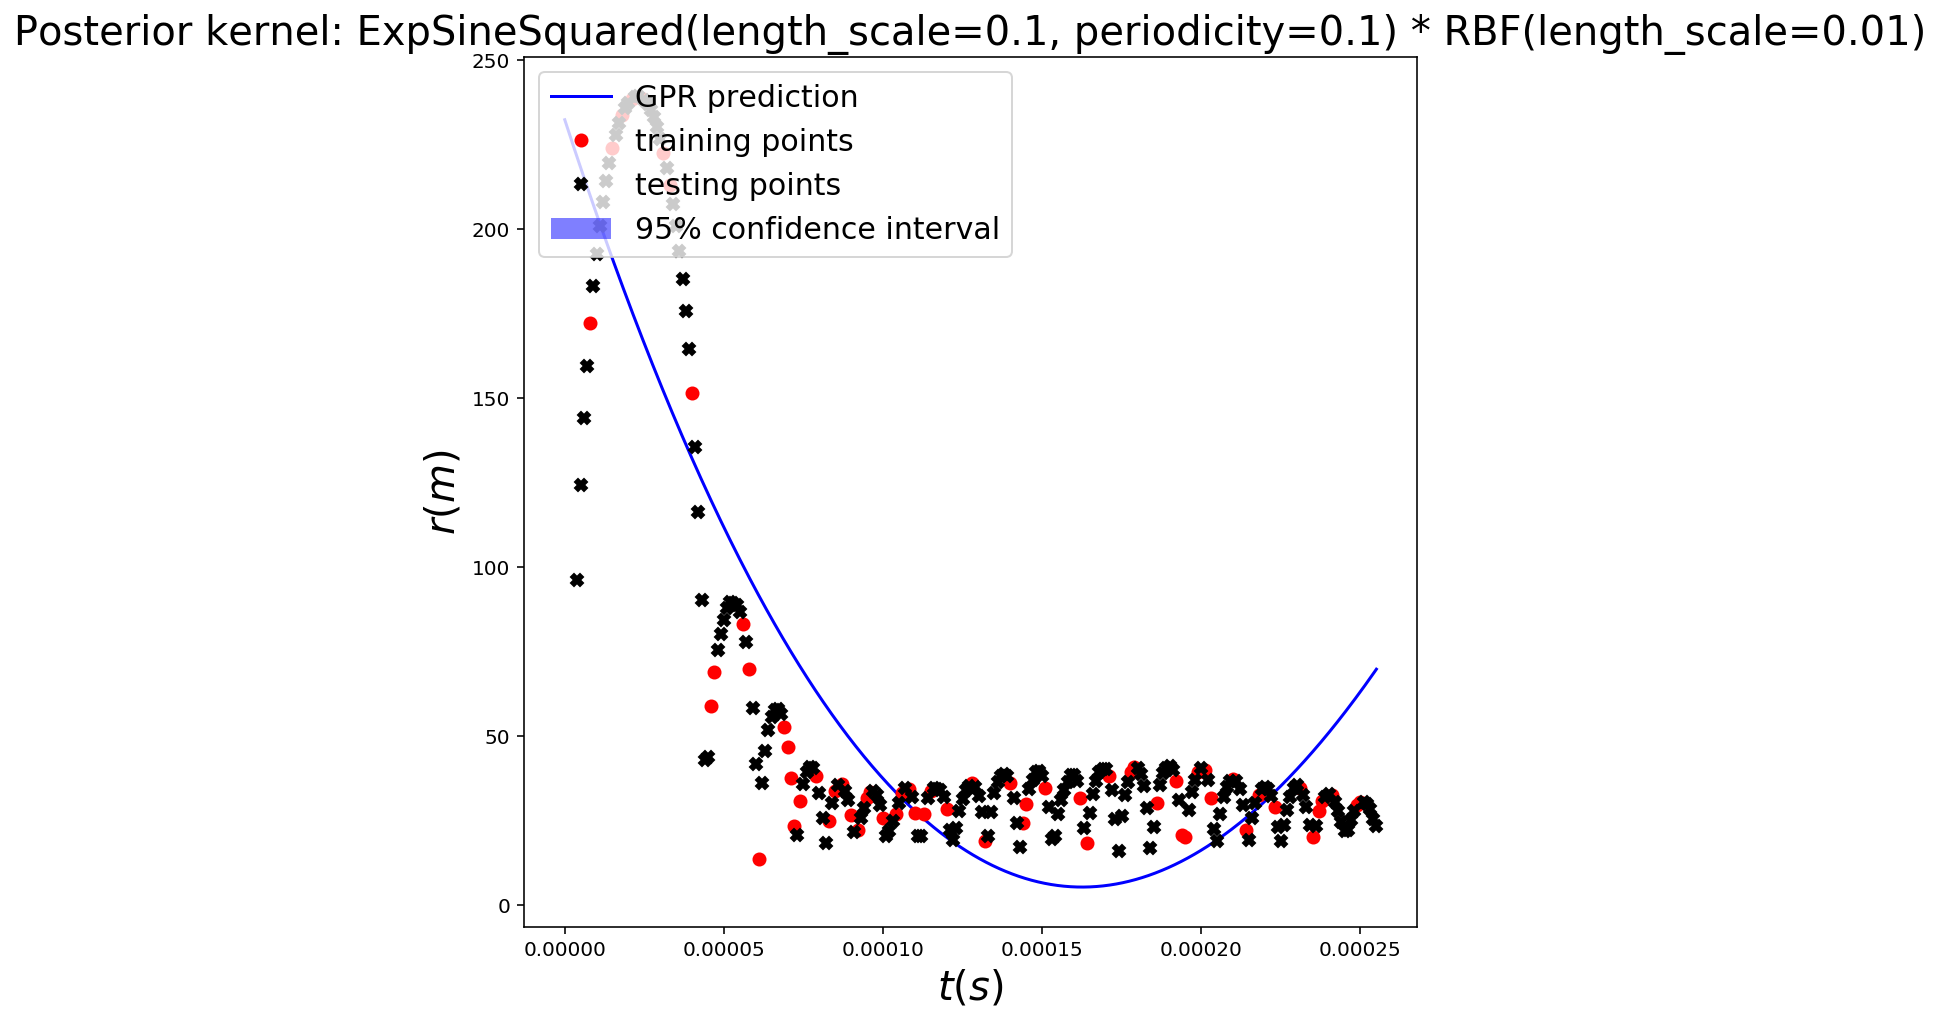

In [99]:
fig1

<k id='Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b'></k>

### Training with Different Kernels: Matern with an optimizer fmin_1_bfgs_b

In [109]:
# Define the kernel function
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)
#gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_exp_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [110]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

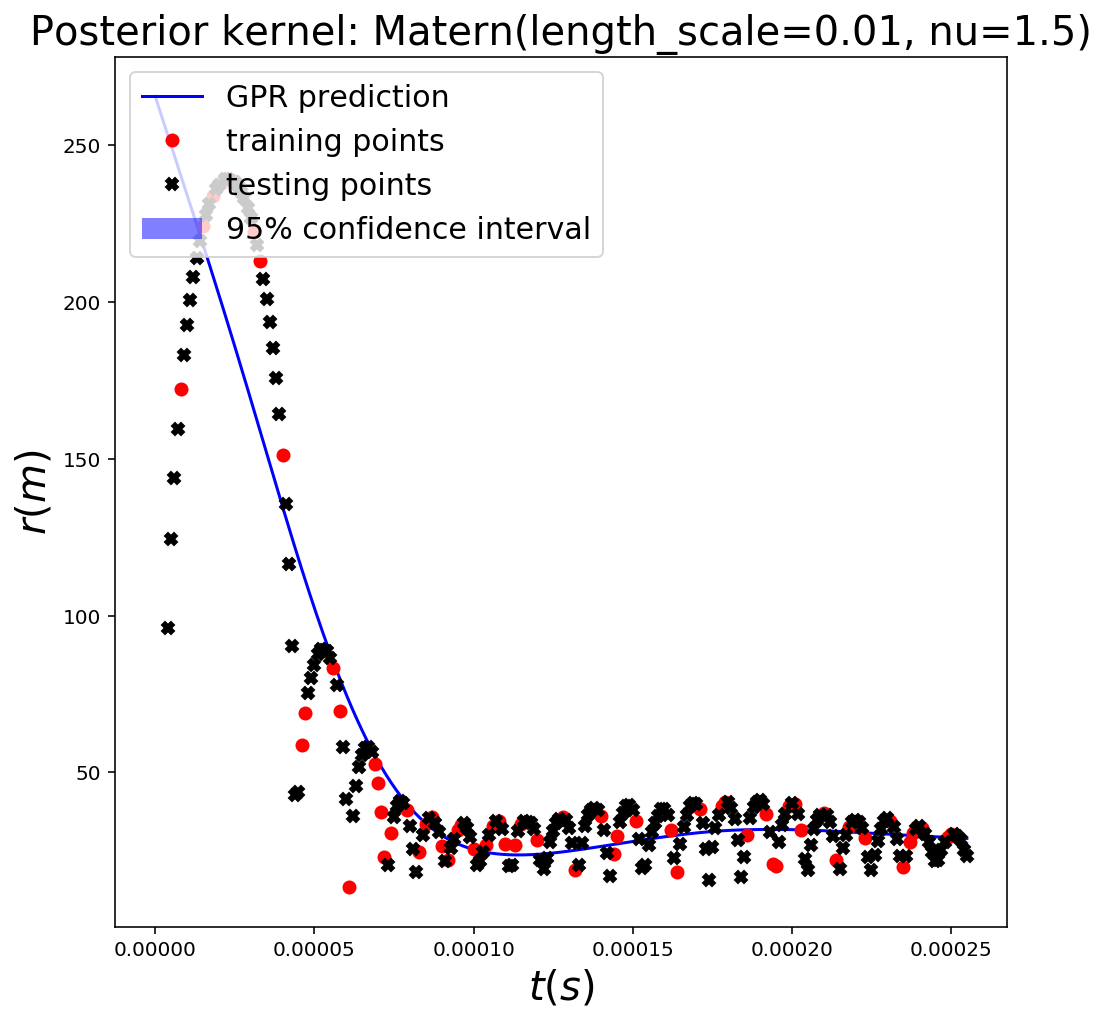

In [111]:
fig1

## with no optimizer? or different optimizers?

<l id='Phase 2: Training with Simulation Data and Testing with Experimental Data'></l>

# Phase 2: Training with Simulation Data and Testing with Experimental Data
## running with Constant Kernel and  f_min optimizer, Matern kernel with no optimizer

In [116]:
# training data = simulation data, test data = experimental data

# defining training data
X_train = X_data # a 2D array that scikit-learn likes, for simulated data
y_train = Data_y

# defining test data
X_test = t_data
y_test = Data_R1_exp
#y_train2 = Data_R2_exp

n_data = len(Data_t_exp) # number of points in our dataset
#testset_ratio = len(X_train)/len(Data_t_exp) # ratio of test set points from the datasets

x_train = X_train.ravel() # just for plotting later
x_test = X_test.ravel() # just for plotting later

print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

1999
1999
255
255


<m id='Constant Kernel and  f_min optimizer'></m>

### Constant Kernel and  f_min optimizer

In [117]:
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the very common Constant*RBF kernel

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [118]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

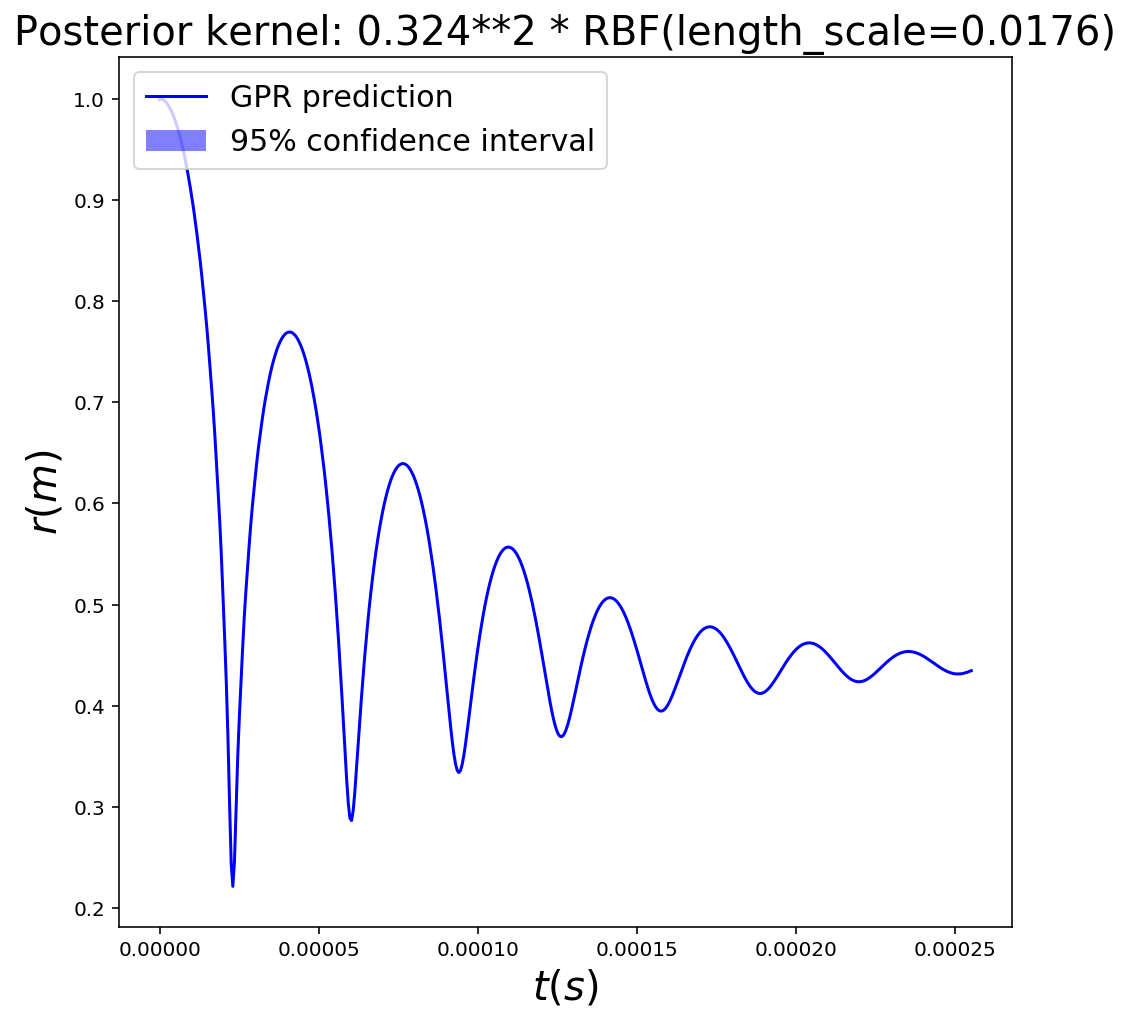

In [119]:
fig1

<n id='Matern kernel with no optimizer'></n>

### Matern kernel with no optimizer

In [120]:
# Define the kernel function
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)

gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None, n_restarts_optimizer=20)

# Fit to data to determine parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_plot_pred, sigma_plot = gp_model.predict(X_plot, return_std=True) # also output the uncertainty (std)

# Predict for test set (for error metric)
y_pred, sigma = gp_model.predict(X_test, return_std=True) # also output the uncertainty (std)

In [121]:
# Plot the prediction and the 95% confidence interval
fig1, ax1 = plt.subplots()

ax1.plot(x_exp_plot, y_plot_pred, 'b-', label="GPR prediction")
ax1.fill(np.concatenate([x_exp_plot, x_exp_plot[::-1]]),
         np.concatenate([y_plot_pred - 1.9600 * sigma_plot,
                        (y_plot_pred + 1.9600 * sigma_plot)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

#ax1.plot(x_train, y_train, 'ro', markersize=6, label="training points") # noiseless data
#ax1.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # Plot test points

ax1.set_xlabel('$t (s)$', fontsize=20)
ax1.set_ylabel('$r (m)$', fontsize=20)
ax1.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=20) # Show in the title the value of the hyperparameters
#ax1.set_ylim(-10, 15) # just to provide more space for the legend
ax1.legend(loc='upper left', fontsize=15)
fig1.set_size_inches(8,8)
plt.close(fig1) # close the plot to see it in next cell

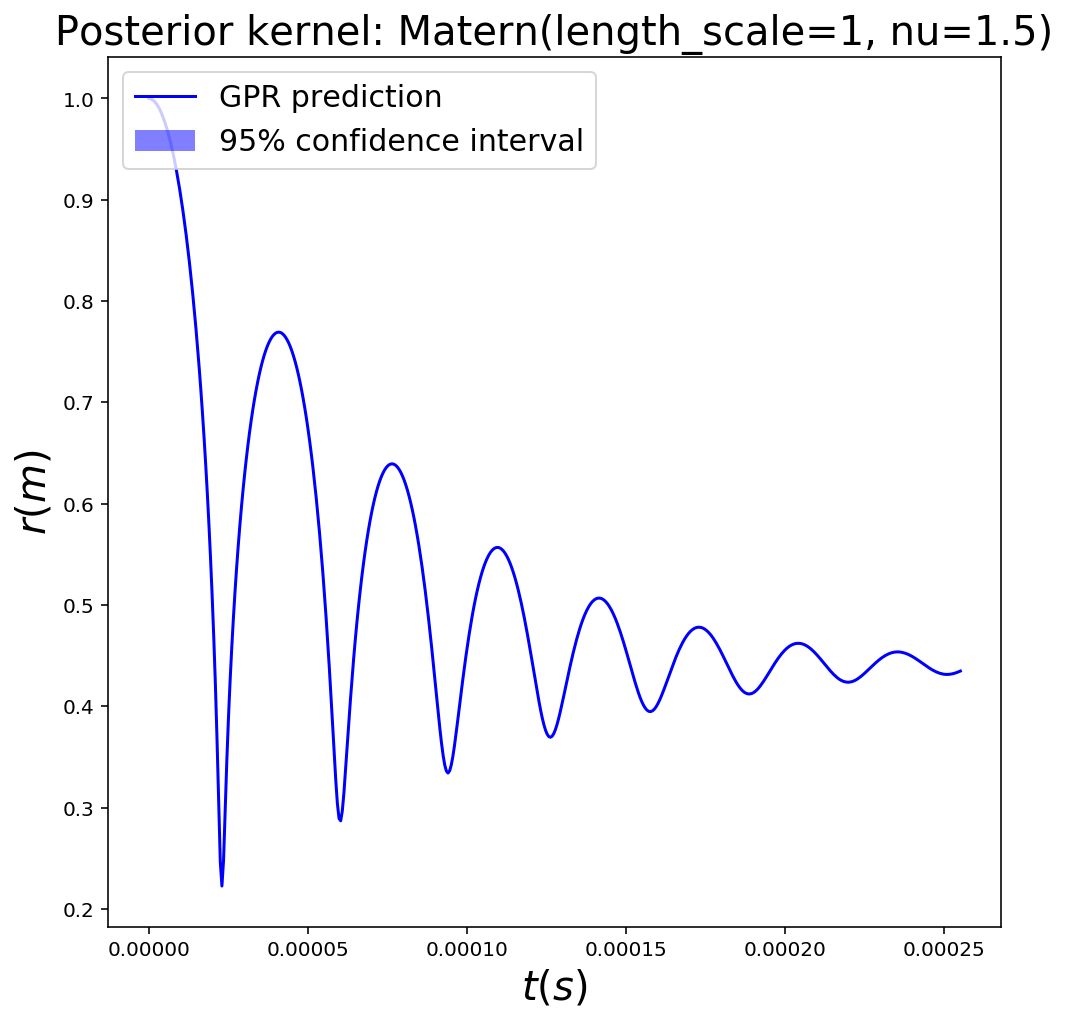

In [122]:
fig1

<o id='Phase 3: Multi-fidelity Gaussian Process'></o>

# Phase 3: Multi-fidelity Gaussian Process
## not botorch, only do gpytorch for the scope of this project

In [2]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
#botorch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.utils import standardize
from gpytorch.mlls import ExactMarginalLogLikelihood

#fit model
train_X = torch.rand(10, 2)
Y = 1 - torch.linalg.norm(train_X - 0.5, dim=-1, keepdim=True)
Y = Y + 0.1 * torch.randn_like(Y)  # add some noise
train_Y = standardize(Y)

gp = SingleTaskGP(train_X, train_Y)
mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
fit_gpytorch_mll(mll)

In [ ]:
#construct acquisition function
from botorch.acquisition import UpperConfidenceBound

UCB = UpperConfidenceBound(gp, beta=0.1)

In [ ]:
#optimize acquisition function
from botorch.optim import optimize_acqf

bounds = torch.stack([torch.zeros(2), torch.ones(2)])
candidate, acq_value = optimize_acqf(
    UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
)
candidate  # tensor([0.4887, 0.5063])

In [ ]:
#gpytorch
#setting up training/testing data
#setting up the model
#training the model
#make predictions with the model
#plot the model fit 

<p id='Phase 4: Comparing Error Metrics'></p>

# Phase 4: Comparing Error Metrics
# Phase 5: Different Materials? More data files? Different shear moduli/viscosity (hyperparameters?)
## Slides (12) for presentation: 2 GP (M), 4 data-assim (V), 4 - multi-fidelity (M), 2 - ? (V)

### want understanding: why chose those algorithms, compare algorithms, explain new methods used

### HAVE TO SCALE DATA